## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score


sns.set_style('darkgrid')

# Perguntas


In [ ]:
# importing the dataset that will be used for these exercises
bikes_df = pd.read_csv('https://raw.githubusercontent.com/victoraccete/ML-bootcamp/master/datasets/comp_bikes_mod.csv')
bikes_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
6,7.0,2011-01-01,1.0,0.0,1.0,NaN,0.0,6.0,0.0,1.0,0.22,0.2727,NaN,NaN,2.0,0.0,2.0
7,8.0,2011-01-01,1.0,0.0,1.0,7.0,0.0,6.0,0.0,NaN,0.20,0.2576,0.86,0.0000,NaN,2.0,3.0
8,9.0,2011-01-01,1.0,0.0,1.0,8.0,0.0,NaN,0.0,NaN,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0
9,10.0,2011-01-01,1.0,0.0,NaN,9.0,0.0,6.0,0.0,1.0,NaN,0.3485,0.76,0.0000,8.0,6.0,14.0


## Pergunta 1
No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

In [ ]:
bikes_df.shape

(17379, 17)

**R:** 17379 instâncias e 17 atributos. 

## Pergunta 2
Quantos tipos diferentes de dados existem no dataset do desafio?

In [ ]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


## Pergunta 3
Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?


In [ ]:
# getting the amount of null values
na_in_temp = bikes_df.temp.isna().sum()
na_in_temp

1738

In [ ]:
# it will print exactly the same non-null values for temp that our df.info() gave us
len(bikes_df.temp) - na_in_temp # just to check if it is correct

15641

In [ ]:
print("R: {0:.1f}%".format((na_in_temp/len(bikes_df.temp)) * 100))

R: 10.0%


## Pergunta 4
Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?

In [ ]:
bikes_df.dropna(subset=['dteday'], inplace=True)
bikes_df.shape

(15641, 17)

In [ ]:
bikes_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
6,7.0,2011-01-01,1.0,0.0,1.0,NaN,0.0,6.0,0.0,1.0,0.22,0.2727,NaN,NaN,2.0,0.0,2.0
7,8.0,2011-01-01,1.0,0.0,1.0,7.0,0.0,6.0,0.0,NaN,0.20,0.2576,0.86,0.0000,NaN,2.0,3.0
8,9.0,2011-01-01,1.0,0.0,1.0,8.0,0.0,NaN,0.0,NaN,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0
9,10.0,2011-01-01,1.0,0.0,NaN,9.0,0.0,6.0,0.0,1.0,NaN,0.3485,0.76,0.0000,8.0,6.0,14.0
10,11.0,2011-01-01,1.0,0.0,NaN,10.0,0.0,6.0,0.0,1.0,0.38,0.3939,0.76,0.2537,12.0,24.0,36.0


## Pergunta 5
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

In [ ]:
bikes_df['temp'].mean() # could also be bikes_df.temp.mean()

0.4969259206597582

## Pergunta 6
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?

In [ ]:
bikes_df.windspeed.std()

0.12230930508286268

## Pergunta 7
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?

In [ ]:
bikes_df.season.unique()

array([ 1., nan,  2.,  3.,  4.])

In [ ]:
pd.Categorical(bikes_df.season)

[1.0, 1.0, 1.0, 1.0, 1.0, ..., 1.0, NaN, 1.0, 1.0, NaN]
Length: 15641
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

## Pergunta 8
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?

In [ ]:
# it is a string
type(bikes_df.dteday[1])

str

In [ ]:
pd.to_datetime(bikes_df['dteday']).tail(1)

17378   2012-12-31
Name: dteday, dtype: datetime64[ns]

## Pergunta 9
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerando o boxplot da variável "windspeed" (velocidade do vento), é CORRETO afirmar:
* A) Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.
* B) Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.
* C) Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.
* D) Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

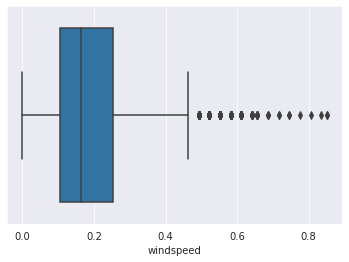

In [ ]:
sns.boxplot(bikes_df.windspeed)

**R: D) Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.**

## Pergunta 10
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed", "cnt". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt", é CORRETO afirmar:
* A) Possuem alta correlação linear negativa.
* B) Possuem alta correlação linear positiva.
* C) Possuem baixa correlação linear positiva.
* D) Possuem baixa correlação linear negativa.

In [ ]:
col_list = ['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
reduced_bikes_df = bikes_df.loc[:, col_list]
corr_matrix = reduced_bikes_df.corr()
corr_matrix

,season,temp,atemp,hum,windspeed,cnt
season,1.000000,0.311273,0.319559,0.146984,-0.149802,0.179190
temp,0.311273,1.000000,0.988102,-0.069887,-0.016022,0.405867
atemp,0.319559,0.988102,1.000000,-0.054224,-0.058803,0.403810
hum,0.146984,-0.069887,-0.054224,1.000000,-0.289859,-0.323409
windspeed,-0.149802,-0.016022,-0.058803,-0.289859,1.000000,0.091747
cnt,0.179190,0.405867,0.403810,-0.323409,0.091747,1.000000


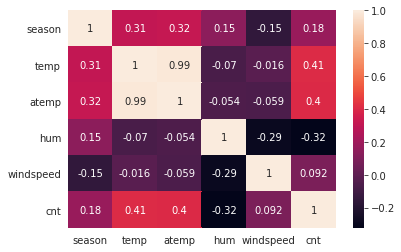

In [ ]:
sns.heatmap(corr_matrix, annot=True)

**R: D) Possuem baixa correlação linear negativa.**

## Pergunta 11
Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

In [ ]:
col_list = ['hum', 'cnt', 'casual']
reduced_bikes_df = bikes_df.loc[:, col_list]
reduced_bikes_df.head()

,hum,cnt,casual
1,0.80,40.0,8.0
2,0.80,32.0,5.0
3,0.75,13.0,3.0
4,0.75,1.0,0.0
5,0.75,1.0,0.0


In [ ]:
reduced_bikes_df.isna().sum()

hum       1571
cnt       1562
casual    1570
dtype: int64

In [ ]:
reduced_bikes_df.mean()

hum         0.627357
cnt       189.165850
casual     35.416317
dtype: float64

In [ ]:
reduced_bikes_df.fillna(reduced_bikes_df.mean(), inplace=True)
reduced_bikes_df.isna().sum()

hum       0
cnt       0
casual    0
dtype: int64

In [ ]:
model = sm.OLS.from_formula("cnt ~ hum + casual", data=reduced_bikes_df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     5344.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        02:37:49   Log-Likelihood:                -98626.
No. Observations:               15641   AIC:                         1.973e+05
Df Residuals:                   15638   BIC:                         1.973e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.2934      4.305     40.251      0.000     164.854     181.732
hum          -99.7501      6.099    -16.355      0.000    -111.705     -87.796
casual         2.2151      0.024     91.848      0.000       2.168       2.262
==============================================================================
Omnibus:                     5515.343   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21209.647
Skew:                           1.743   Prob(JB):                         0.00
Kurtosis:                       7.515   Cond. No.                         406.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R: R-squared = 0.40**

## Pergunta 12
Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique Árvore de Decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".


In [ ]:
ind_vars = reduced_bikes_df[['hum','casual']].values 
dep_var = reduced_bikes_df['cnt'].values
type(ind_vars) # automatically converted to numpy

numpy.ndarray

In [ ]:
regr_1 = DecisionTreeRegressor()
regr_1.fit(ind_vars, dep_var)
predicted_values = regr_1.predict(ind_vars)
r_squared = r2_score(dep_var, predicted_values)
print("R-square for decision tree: {0:.4f}".format(r_squared))

R-square for decision tree: 0.7098


## Pergunta 13
Comparando os valores de R2 encontrado com a regressão linear e com a Árvore de Decisão, é CORRETO afirmar:
* A) O valor encontrado pela Árvore de Decisão foi negativo.
* B) O valor obtido pela Árvore de Decisão como regressor apresenta maior R2.
* C) Os valores encontrados pela Árvore de Decisão como regressor e a regressão linear são próximos.
* D) O valor encontrado pela regressão linear é superior ao encontrado pela Árvore de Decisão.

**R: B) O valor obtido pela Árvore de Decisão como regressor apresenta maior R2.**

## Pergunta 14
Comparando o SVM com a Árvore de Decisão é CORRETO afirmar:
* A) SVM e Árvore de Decisão só podem ser utilizados para modelos de classificação.
* B) Através da Árvore de Decisão não é possível encontrar os limiares de separação entre as classes.
* C) SVM encontra o hiperplano que gera a maior separação entre os dados.
* D) Árvore de Decisão encontra os hiperplanos de separação do mesmo modo que o SVM.

**R: C) SVM encontra o hiperplano que gera a maior separação entre os dados.**

## Pergunta 15
Com base na Árvore de Decisão é CORRETO afirmar:
* A) A análise de regressão com a Árvore de Decisão só pode ser realizada com valores categóricos.
* B) Ávore de Decisão é utilizada apenas para a classificação de dados contínuos.
* C) Não é possível encontrar os limites de separação entre os conjuntos de dados a partir de uma classificação realizada através da Árvore de Decisão.
* D) Pode ser utilizada para classificação e regressão.

**R: D) Pode ser utilizada para classificação e regressão.**